## Bike Rental Case Study
### Problem statement and Business Objective
The business problem demands to predict the variables or the predictors that are influencing the demand of the bikes.
So we will create a predictive model through linear regression that emphasizes on the variable accuracy rather than the accuracy of the result.
The model should be a simple one as busieness will study this model and can take up strategic decisions.

In [2]:
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

In [48]:
print(pd.__version__)
print(np.__version__)
print(sns.__version__)

2.0.3
1.24.3
0.12.2


## Our approach in building linear regression model.
### Since this is a supervised model and the business requirement is to understand the predictor variables we will perform the below steps to build our model
>1. Data understanding
>2. Data quality check
>3. Exploratory data analysis on train data
>4. Prparation of dummy variables
>5. Test-Train Split 
>6. Scaling of train data
>7. Linear model building
>8. Evaluate model on train data
>9. Apply model on test data
>10.Conclude model quality  


# Step 1 - Data Understanding
---

In [3]:
# load file in data frame
bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike.shape

(730, 16)

In [5]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Dataset is having 730 number of rows whcih are not really enough for a predictive model.
### We have one date field ` dteday` with datatype as object.
### We have already learnt from the problem statement that some of the columns like `weathersit,season` although are given as int but they are categorical variables in nature. We will handle them later.

# Step 2 - Data Quality Check
---

In [6]:
# Null count in dataset
bike.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### No action needed on null imputation as no null values in the data set

### From data analysis we see few columns are redundent for our purpose
>1. instant = This is an index column, we can drop this.
>2. casual and registered = From data dictionary we know that these 2 fields seggregates the bike usage into 2 categories but does not influence the number of bikes used in any extent, we will drop them
>3. dteday = This is date column, but we already have days, months and year columns. We can drop this one

In [7]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
# Dropping columns
bike.drop(columns = ['instant','casual','registered','dteday'],axis =1,inplace = True)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [9]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


# Step 3 - We will perform EDA 
---

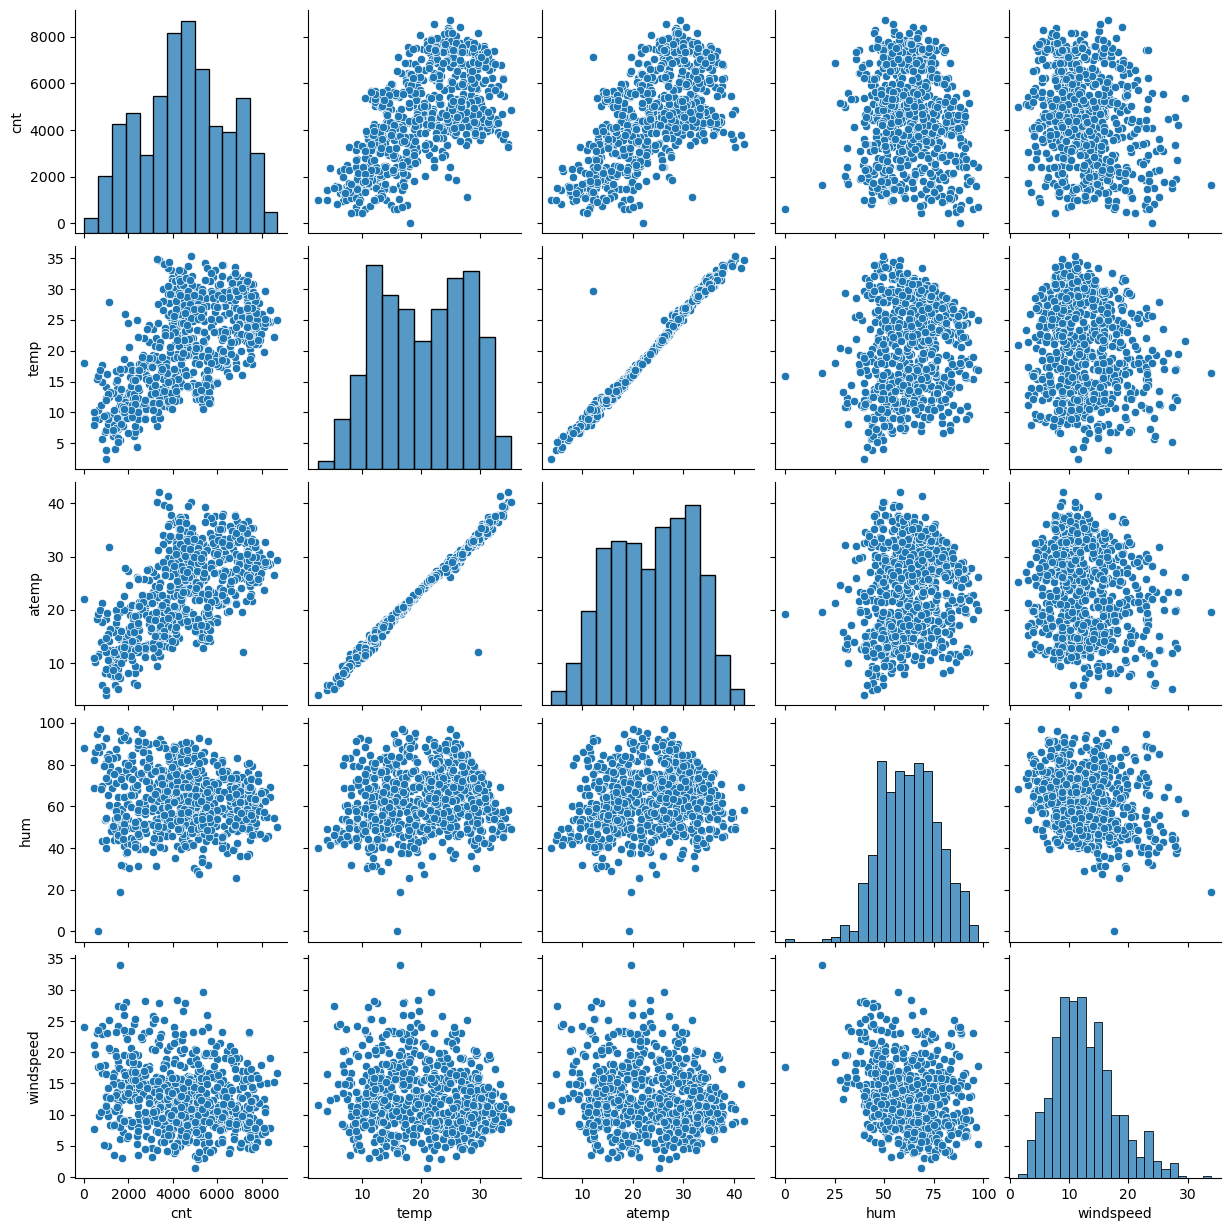

In [10]:
# Visualization of continious variables on train data set
cont_var = ['cnt','temp','atemp','hum','windspeed']
sns.pairplot(bike[cont_var])
plt.show()

### We see both positive and negative linear relationship in the plot
>1. We see temp and atemp are strongly relared or collinear
>2. cnt is positively linear to temp
>3. cnt is negatively linear to hum and windspeed

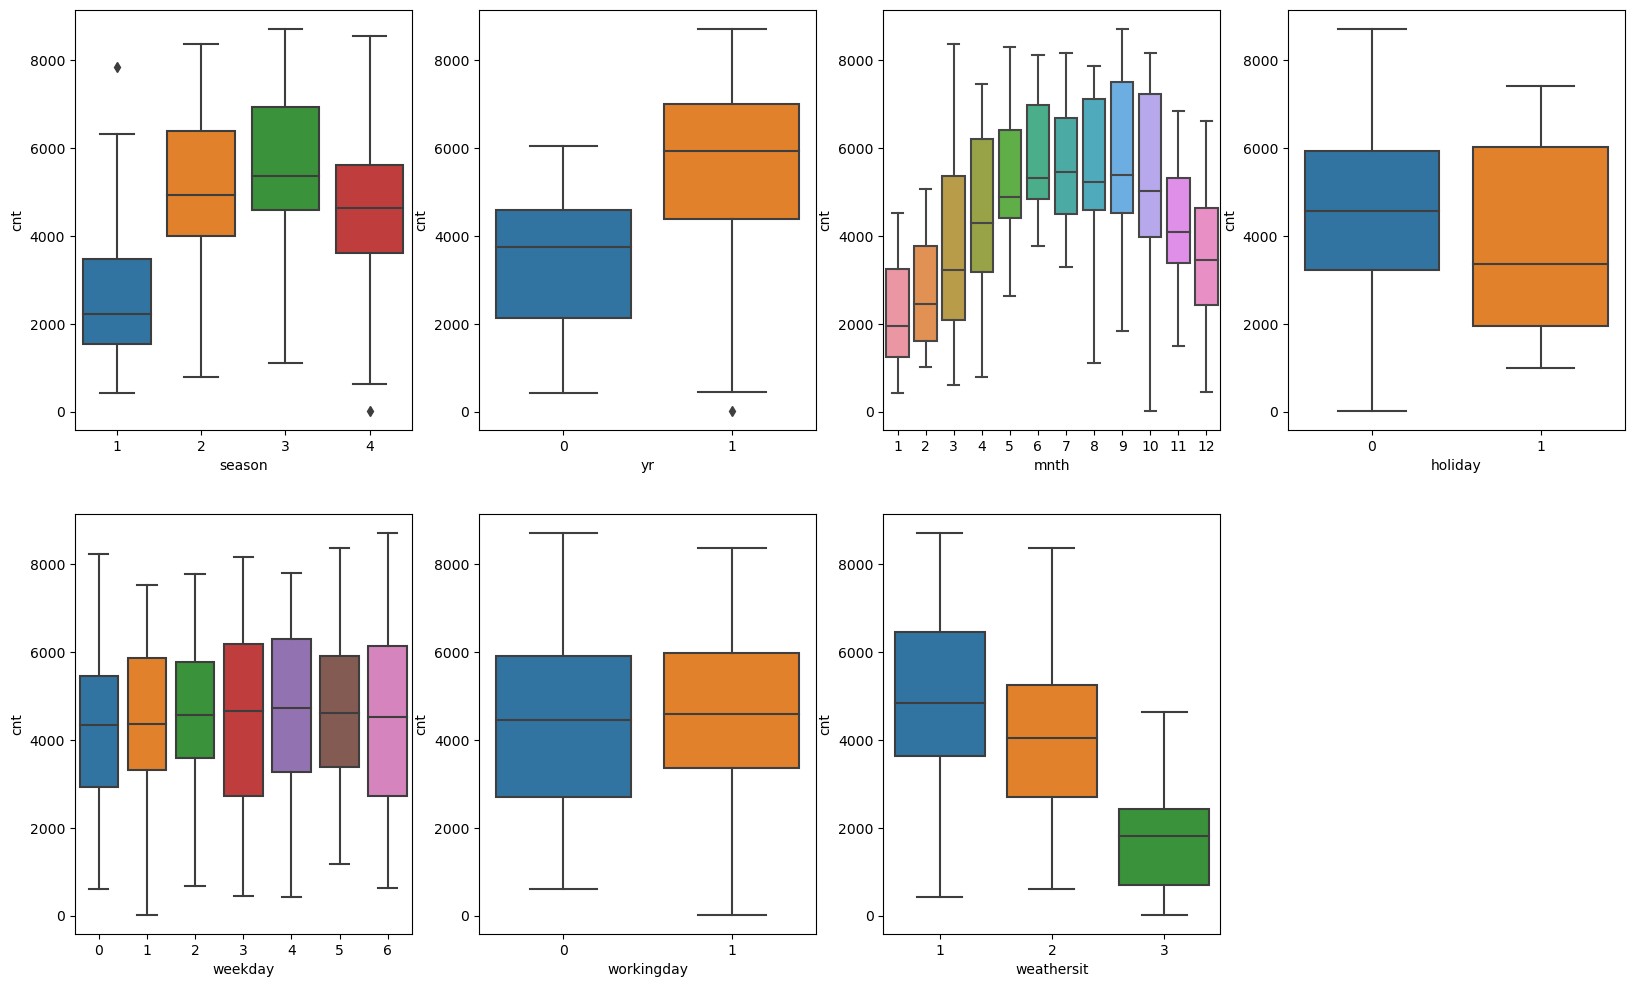

In [11]:
# Analysis of Categorical variables

cat_var = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(20,12))
count = 0
for i in  cat_var:
    count = count +1
    plt.subplot(2,4,count)
    sns.boxplot(x=i,y='cnt',data=bike)

plt.show()

## Categorical variable analysis

>1. Season wise we can see median is much higher for 3 (fall) compared to 1 (spring). This indicates that season is a potential predictor variable.
>2. year wise a higher trend in 2019 compared to 2018, i.e. there is an year to year growth.
>3. month wise we see the pick at around 6,7,8,9 with median is more than 5000. Where as month 1,2,3 and  11,12 saw median less than 4000. This indicates the possibility of month wise booking trend.
>4. demand is higher on weekday compared to holdays. 
>5. A clear day shows much higher demand compared to rainy or snowy day. So weathersit is a potential predictor.

# Step 4 - Preparation of dummy variables
---

### From data dictionary we know that few of the variables although given as int they are not continious variables, rather they are categorical variables. We have to create dummy variables for those categorical variables.
### Such variables are
>1.  mnth
>2.  weekday
>3.  weathersit
>4.  season
#### There are few more as `yr,holiday,workingday` , but we dont have to create dummy var for them as they have only 2 categories

In [12]:
# We will first change the data type of thew afore mentioned variables to category. And then we will create dummies
# This will create dummy variables for them and drop the original variable from the data set

bike['season']=bike['season'].astype('category')
bike['weathersit']=bike['weathersit'].astype('category')
bike['mnth']=bike['mnth'].astype('category')
bike['weekday']=bike['weekday'].astype('category')

In [13]:
bike = pd.get_dummies(bike,dtype=int,drop_first=True)
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    int32  
 9   season_3      730 non-null    int32  
 10  season_4      730 non-null    int32  
 11  mnth_2        730 non-null    int32  
 12  mnth_3        730 non-null    int32  
 13  mnth_4        730 non-null    int32  
 14  mnth_5        730 non-null    int32  
 15  mnth_6        730 non-null    int32  
 16  mnth_7        730 non-null    int32  
 17  mnth_8        730 non-null    int32  
 18  mnth_9        730 non-null    

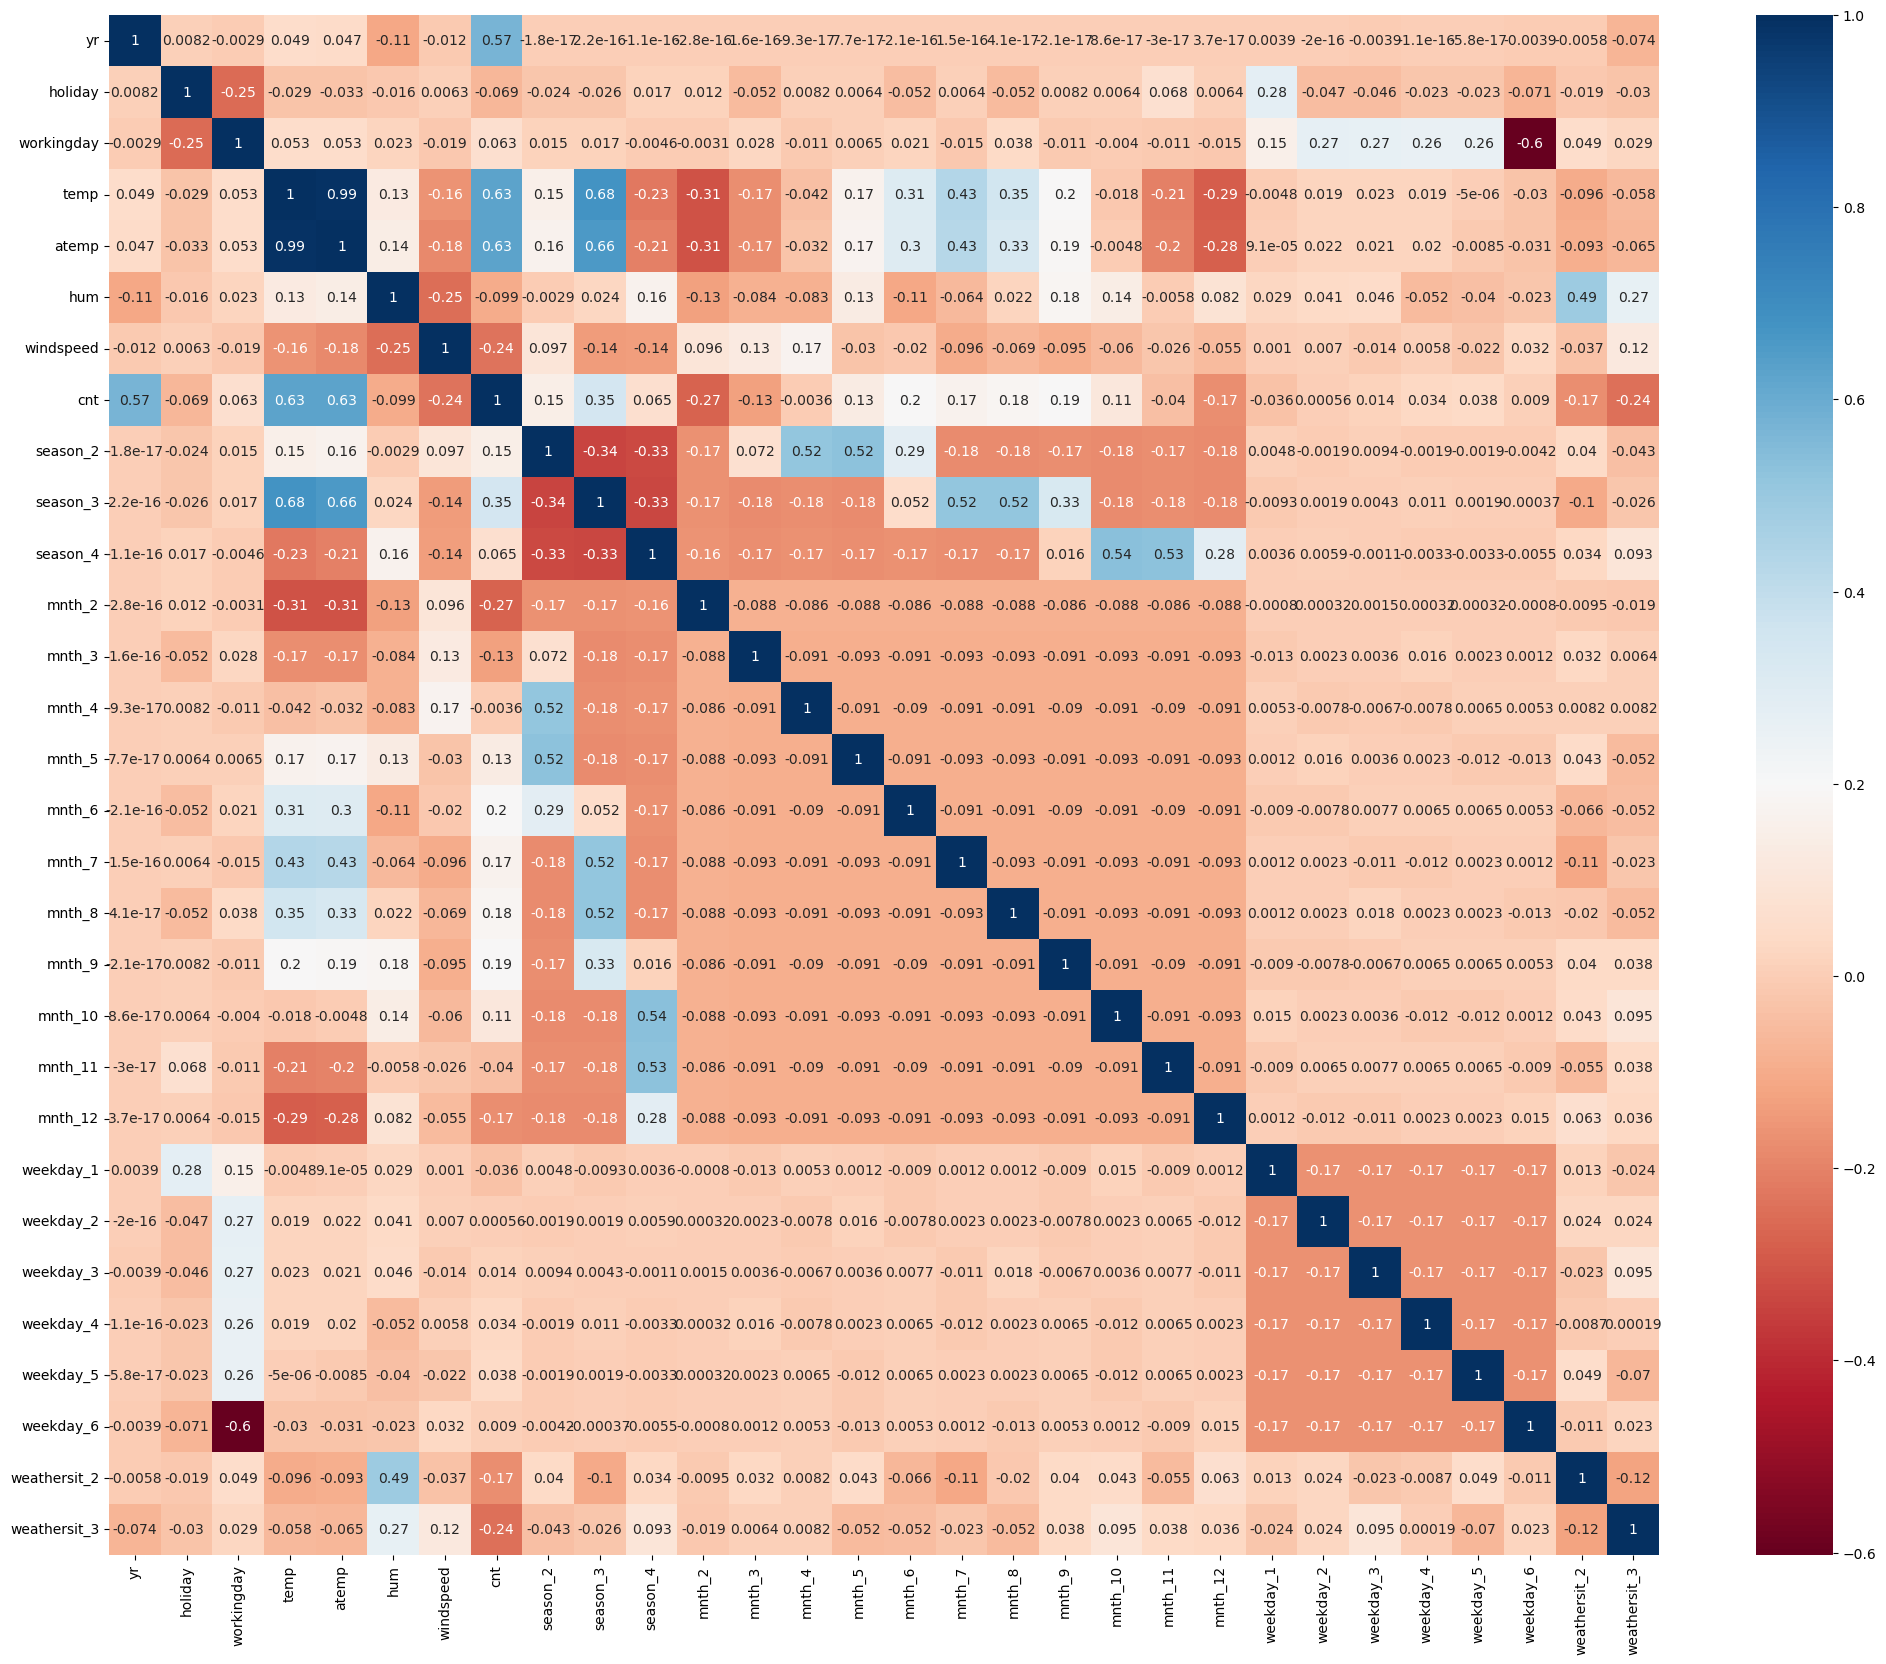

In [14]:
# A corelation heat map
plt.figure(figsize = (25,20))
sns.heatmap(bike.corr(), annot = True, cmap="RdBu")
plt.show()

## We see a a very strong co relation between temp and atemp, we will drop atemp to avoid colinearity

In [15]:
# Drop atemp
bike.drop(columns=['atemp'],axis=1,inplace=True)
bike.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,1,0,0,0,0,0


# Step 5- Test-Train Split
---
### We will perform train-test split to a ratio of 70:30 using skt-learn library

In [16]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train,df_test = train_test_split(bike,train_size=.7,random_state=280)


In [50]:
import sklearn

print(sklearn.__version__)

1.3.0


In [17]:
df_test.shape

(220, 29)

# Step 6 - Scaling of train data
---
### We want to perform scaling for the numeric variables. Scaling is performed after train test split because otherwise if had performed scaling before split then the train data could have been overfit. We see humidity is much higher in values than some of the others like - temp,atemp,windspped. So unless we perform scaling we will not be able to find the depedencies of the predictor variables.

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [19]:
# Values before scaling
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
701,1,0,1,18.5525,76.7500,5.542294,6234,0,0,1,...,0,1,1,0,0,0,0,0,0,0
3,0,0,1,8.2000,59.0435,10.739832,1562,0,0,0,...,0,0,0,1,0,0,0,0,0,0
129,0,0,1,21.8325,48.9167,7.749957,4803,1,0,0,...,0,0,0,1,0,0,0,0,0,0
117,0,0,1,25.3175,70.0833,21.500836,4058,1,0,0,...,0,0,0,0,0,1,0,0,1,0
152,0,0,1,29.3150,30.5000,19.583229,4968,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [20]:
# Get the numeric variables for scaling
num_vars = ['temp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(X=df_train[num_vars])

In [21]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
701,1,0,1,0.472360,0.716695,0.150867,0.700592,0,0,1,...,0,1,1,0,0,0,0,0,0,0
3,0,0,1,0.136488,0.469484,0.344861,0.136545,0,0,0,...,0,0,0,1,0,0,0,0,0,0
129,0,0,1,0.578775,0.328098,0.233266,0.527828,1,0,0,...,0,0,0,1,0,0,0,0,0,0
117,0,0,1,0.691840,0.623617,0.746509,0.437885,1,0,0,...,0,0,0,0,0,1,0,0,1,0
152,0,0,1,0.821533,0.070971,0.674935,0.547748,1,0,0,...,0,0,0,0,0,1,0,0,0,0


# Step 7 Linear model building
---
>1.  Create X and y from train and later from test data
>2.  Start with a stasmodel and check the model summary
>3.  Apply RFE to filter columns

In [22]:
# Create X and y from the train data set
y_train = df_train.pop('cnt')
X_train = df_train


#### Fit a regression line through the training data using statsmodel as we want to capture the statistical distribution of our linear model on training data. Statsmodel does not consider the intercept inless we impose the constant factor using `sm.add_constant(X)`

In [23]:
import statsmodels.api as sm 

X_train_lm = sm.add_constant(X_train)
X_train_lm.head()


,const,yr,holiday,workingday,temp,hum,windspeed,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
701,1.0,1,0,1,0.472360,0.716695,0.150867,0,0,1,...,0,1,1,0,0,0,0,0,0,0
3,1.0,0,0,1,0.136488,0.469484,0.344861,0,0,0,...,0,0,0,1,0,0,0,0,0,0
129,1.0,0,0,1,0.578775,0.328098,0.233266,1,0,0,...,0,0,0,1,0,0,0,0,0,0
117,1.0,0,0,1,0.691840,0.623617,0.746509,1,0,0,...,0,0,0,0,0,1,0,0,1,0
152,1.0,0,0,1,0.821533,0.070971,0.674935,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [51]:
import statsmodels
print(statsmodels.__version__)

0.14.0


### Model 1
---

In [24]:
# Create the first model

model1 = sm.OLS(y_train, X_train_lm).fit()


In [25]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     115.9
Date:                Thu, 15 Feb 2024   Prob (F-statistic):          1.39e-191
Time:                        12:16:55   Log-Likelihood:                 525.56
No. Observations:                 510   AIC:                            -995.1
Df Residuals:                     482   BIC:                            -876.6
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1082      0.026      4.206      0.000       0.058       0.159
yr               0.2437      0.008     29.735      0.000       0.228       0.260
holiday         -0.0268      0.020     -1.331      0.184      -0.066       0.013
workingday       0.0487      0.009      5.216      0.000       0.030       0.067
temp             0.4556      0.043     10.568      0.000       0.371       0.540
hum             -0.1246      0.031     -4.051      0.000      -0.185      -0.064
windspeed       -0.1258      0.023     -5.538      0.000      -0.170      -0.081
season_2         0.1045      0.025      4.252      0.000       0.056       0.153
season_3         0.0727      0.030      2.460      0.014       0.015       0.131
season_4         0.2031      0.024      8.503      0.000       0.156       0.250
mnth_2           0.0134      0.019      0.692      0.489      -0.025       0.052
mnth_3           0.0613      0.023      2.689      0.007       0.017       0.106
mnth_4           0.0227      0.034      0.671      0.503      -0.044       0.089
mnth_5           0.0630      0.037      1.704      0.089      -0.010       0.136
mnth_6           0.0362      0.039      0.929      0.353      -0.040       0.113
mnth_7           0.0037      0.044      0.084      0.933      -0.082       0.089
mnth_8           0.0470      0.041      1.135      0.257      -0.034       0.128
mnth_9           0.1038      0.037      2.834      0.005       0.032       0.176
mnth_10          0.0376      0.033      1.153      0.250      -0.026       0.102
mnth_11         -0.0506      0.031     -1.637      0.102      -0.111       0.010
mnth_12         -0.0412      0.024     -1.732      0.084      -0.088       0.006
weekday_1       -0.0086      0.010     -0.826      0.409      -0.029       0.012
weekday_2        0.0041      0.011      0.388      0.698      -0.017       0.025
weekday_3        0.0088      0.011      0.830      0.407      -0.012       0.030
weekday_4        0.0056      0.011      0.527      0.598      -0.015       0.026
weekday_5        0.0120      0.010      1.178      0.239      -0.008       0.032
weekday_6        0.0643      0.015      4.281      0.000       0.035       0.094
weathersit_2    -0.0518      0.011     -4.851      0.000      -0.073      -0.031
weathersit_3    -0.2036      0.027     -7.545      0.000      -0.257      -0.151
==============================================================================
Omnibus:                       35.028   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.177
Skew:                          -0.437   Prob(JB):                     7.03e-15
Kurtosis:                       4.518   Cond. No.                     9.69e+15
==============================================================================

Notes:
[1] Stand

## Model 2
---
### Our first model has too many variables and some of them have high p-value. We will now apply RFE to eliminate insignificant predictor variables

In [26]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [27]:
# Apply RFE to reduce predictor variables from 30 to 15

# Build model object
model = LinearRegression()
model.fit(X_train,y_train)

# Run RFE
rfe = RFE(model,n_features_to_select=15)
rfe.fit(X_train,y_train)

# list rfe outcome
list(zip(X_train.columns,rfe.support_,rfe.ranking_))




[('yr', True, 1),
 ('holiday', False, 3),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 13),
 ('mnth_3', True, 1),
 ('mnth_4', False, 12),
 ('mnth_5', False, 2),
 ('mnth_6', False, 11),
 ('mnth_7', False, 14),
 ('mnth_8', False, 9),
 ('mnth_9', True, 1),
 ('mnth_10', False, 10),
 ('mnth_11', True, 1),
 ('mnth_12', True, 1),
 ('weekday_1', False, 4),
 ('weekday_2', False, 8),
 ('weekday_3', False, 6),
 ('weekday_4', False, 7),
 ('weekday_5', False, 5),
 ('weekday_6', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

### We will eliminate all the columns where rfe.support_ = false

In [28]:
# Get the columns where ref.support_ = true
X_train.columns[rfe.support_]

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'season_2', 'season_3',
       'season_4', 'mnth_3', 'mnth_9', 'mnth_11', 'mnth_12', 'weekday_6',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [29]:
# Create a dataframe using RFE supported variables 
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.columns

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'season_2', 'season_3',
       'season_4', 'mnth_3', 'mnth_9', 'mnth_11', 'mnth_12', 'weekday_6',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [30]:
# Now create the model with the  RFE supported predictors

X_train_lm2 = sm.add_constant(X_train_rfe)
model2 = sm.OLS(y_train,X_train_lm2).fit()
model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     206.6
Date:                Thu, 15 Feb 2024   Prob (F-statistic):          1.16e-201
Time:                        12:16:56   Log-Likelihood:                 518.00
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     494   BIC:                            -936.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0992      0.023      4.287      0.000       0.054       0.145
yr               0.2434      0.008     29.910      0.000       0.227       0.259
workingday       0.0607      0.011      5.701      0.000       0.040       0.082
temp             0.4823      0.032     15.029      0.000       0.419       0.545
hum             -0.1104      0.029     -3.758      0.000      -0.168      -0.053
windspeed       -0.1246      0.022     -5.540      0.000      -0.169      -0.080
season_2         0.1233      0.015      8.443      0.000       0.095       0.152
season_3         0.0769      0.021      3.702      0.000       0.036       0.118
season_4         0.2170      0.015     14.202      0.000       0.187       0.247
mnth_3           0.0415      0.015      2.784      0.006       0.012       0.071
mnth_9           0.0718      0.016      4.379      0.000       0.040       0.104
mnth_11         -0.0800      0.018     -4.333      0.000      -0.116      -0.044
mnth_12         -0.0627      0.016     -3.945      0.000      -0.094      -0.031
weekday_6        0.0711      0.014      5.014      0.000       0.043       0.099
weathersit_2    -0.0542      0.011     -5.132      0.000      -0.075      -0.033
weathersit_3    -0.2117      0.027     -7.962      0.000      -0.264      -0.159
==============================================================================
Omnibus:                       36.080   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.577
Skew:                          -0.495   Prob(JB):                     1.91e-13
Kurtosis:                       4.333   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
# Check the VIF for each variable for the model2
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,20.13
3,hum,11.67
6,season_3,6.53
4,windspeed,4.32
1,workingday,4.28
5,season_2,3.61
7,season_4,3.61
13,weathersit_2,2.34
0,yr,2.01
10,mnth_11,1.83


## Model 3 
---
#### We will remove season_3 for this model. Although temp and hum has higher VIF but a domain knowledge prompts us that these two could be significant.

In [32]:
X_train_rfe.drop(["season_3"], axis = 1,inplace=True)
X_train_lm3 = sm.add_constant(X_train_rfe)
model3 = sm.OLS(y_train,X_train_lm3).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     214.9
Date:                Thu, 15 Feb 2024   Prob (F-statistic):          6.51e-200
Time:                        12:16:56   Log-Likelihood:                 511.02
No. Observations:                 510   AIC:                            -992.0
Df Residuals:                     495   BIC:                            -928.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0970      0.023      4.143      0.000       0.051       0.143
yr               0.2397      0.008     29.306      0.000       0.224       0.256
workingday       0.0604      0.011      5.608      0.000       0.039       0.082
temp             0.5758      0.020     28.687      0.000       0.536       0.615
hum             -0.1268      0.029     -4.312      0.000      -0.185      -0.069
windspeed       -0.1313      0.023     -5.781      0.000      -0.176      -0.087
season_2         0.0838      0.010      8.303      0.000       0.064       0.104
season_4         0.1844      0.013     14.575      0.000       0.160       0.209
mnth_3           0.0333      0.015      2.231      0.026       0.004       0.063
mnth_9           0.0874      0.016      5.445      0.000       0.056       0.119
mnth_11         -0.0677      0.018     -3.681      0.000      -0.104      -0.032
mnth_12         -0.0563      0.016     -3.518      0.000      -0.088      -0.025
weekday_6        0.0716      0.014      4.981      0.000       0.043       0.100
weathersit_2    -0.0517      0.011     -4.849      0.000      -0.073      -0.031
weathersit_3    -0.1988      0.027     -7.449      0.000      -0.251      -0.146
==============================================================================
Omnibus:                       31.390   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.268
Skew:                          -0.481   Prob(JB):                     1.48e-10
Kurtosis:                       4.098   Cond. No.                         16.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
# Calculate VIF for model 3

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
3,hum,11.20
2,temp,7.01
1,workingday,4.28
4,windspeed,4.26
6,season_4,2.40
12,weathersit_2,2.33
0,yr,1.98
9,mnth_11,1.77
5,season_2,1.68
11,weekday_6,1.65


## Model 4
---
We will now remove hum as it has the highest VIF

In [34]:
X_train_rfe.drop(columns=['hum'],inplace=True,axis=1)


In [35]:
X_train_lm4 = sm.add_constant(X_train_rfe)
model4 = sm.OLS(y_train,X_train_lm4).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     222.1
Date:                Thu, 15 Feb 2024   Prob (F-statistic):          3.79e-197
Time:                        12:16:56   Log-Likelihood:                 501.62
No. Observations:                 510   AIC:                            -975.2
Df Residuals:                     496   BIC:                            -916.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0383      0.019      1.976      0.049       0.000       0.076
yr               0.2457      0.008     29.963      0.000       0.230       0.262
workingday       0.0631      0.011      5.761      0.000       0.042       0.085
temp             0.5568      0.020     27.942      0.000       0.518       0.596
windspeed       -0.1037      0.022     -4.678      0.000      -0.147      -0.060
season_2         0.0826      0.010      8.048      0.000       0.062       0.103
season_4         0.1776      0.013     13.901      0.000       0.152       0.203
mnth_3           0.0333      0.015      2.189      0.029       0.003       0.063
mnth_9           0.0773      0.016      4.785      0.000       0.046       0.109
mnth_11         -0.0677      0.019     -3.613      0.000      -0.104      -0.031
mnth_12         -0.0632      0.016     -3.899      0.000      -0.095      -0.031
weekday_6        0.0743      0.015      5.088      0.000       0.046       0.103
weathersit_2    -0.0786      0.009     -8.922      0.000      -0.096      -0.061
weathersit_3    -0.2577      0.023    -11.044      0.000      -0.304      -0.212
==============================================================================
Omnibus:                       18.628   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.190
Skew:                          -0.363   Prob(JB):                     9.21e-06
Kurtosis:                       3.751   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
# Calculate VIF for model 4
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.58
3,windspeed,4.20
1,workingday,4.08
5,season_4,2.28
0,yr,1.97
8,mnth_11,1.76
4,season_2,1.67
10,weekday_6,1.60
11,weathersit_2,1.52
9,mnth_12,1.41


### We will conclude with model4 as this gives VIF<5 and significant p-values for all predictor variables.

# Step 8 - Evaluate model on Train data
---
### We will see the residual and plot it and check if the residual is normally distributed.

In [37]:
# Get predicted values based on the model co efficients
y_train_pred = model4.predict(X_train_lm4)
y_train_pred

701    0.708881
3      0.141621
129    0.482044
117    0.413163
152    0.571409
         ...   
404    0.426757
647    0.790478
96     0.399587
708    0.590024
89     0.035501
Length: 510, dtype: float64

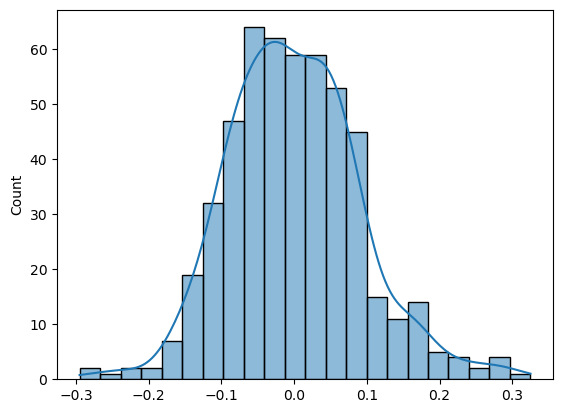

In [38]:
# Get the residuals and plot
res = y_train_pred - y_train
fig = plt.figure()
sns.histplot(res,kde=True)
plt.show()


# Step 9 - Apply model on test data
---
### Now that we have a solid model we will apply this on test data. But before that we have to scale our test data.


In [39]:
# Apply scaling on test data set
# On test data we dont perform fit() as fit() calculates min , max and we are not supposed to know that on the test data set (unknown data). We use the the same fit from the train data and transform the test data using the scaler we created in train data set.

num_vars = ['temp','hum','windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()



,yr,holiday,workingday,temp,hum,windspeed,cnt,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
146,0,0,1,0.777194,0.557882,0.545878,0.512858,1,0,0,...,0,0,0,0,0,0,1,0,0,0
662,1,0,1,0.602053,0.762653,0.255033,0.836412,0,0,1,...,0,0,0,0,0,1,0,0,1,0
182,0,0,0,0.852570,0.265851,0.231743,0.565979,0,1,0,...,0,0,0,0,0,0,0,1,0,0
556,1,0,1,0.823751,0.529377,0.323448,0.824943,0,1,0,...,0,0,0,0,1,0,0,0,0,0
113,0,0,0,0.644176,0.777195,0.424582,0.453942,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [40]:
# Get X and y from test set

y_test = df_test.pop('cnt')
X_test = df_test

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220 entries, 146 to 565
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            220 non-null    int64  
 1   holiday       220 non-null    int64  
 2   workingday    220 non-null    int64  
 3   temp          220 non-null    float64
 4   hum           220 non-null    float64
 5   windspeed     220 non-null    float64
 6   season_2      220 non-null    int32  
 7   season_3      220 non-null    int32  
 8   season_4      220 non-null    int32  
 9   mnth_2        220 non-null    int32  
 10  mnth_3        220 non-null    int32  
 11  mnth_4        220 non-null    int32  
 12  mnth_5        220 non-null    int32  
 13  mnth_6        220 non-null    int32  
 14  mnth_7        220 non-null    int32  
 15  mnth_8        220 non-null    int32  
 16  mnth_9        220 non-null    int32  
 17  mnth_10       220 non-null    int32  
 18  mnth_11       220 non-null    int

In [41]:
# extract those  columns from the test data set which are significant for our model

X_test = X_test[X_train_rfe.columns]
X_test.columns


Index(['yr', 'workingday', 'temp', 'windspeed', 'season_2', 'season_4',
       'mnth_3', 'mnth_9', 'mnth_11', 'mnth_12', 'weekday_6', 'weathersit_2',
       'weathersit_3'],
      dtype='object')

In [42]:
# AddAdd constant using stasmodel on X_test
X_test_lm = sm.add_constant(X_test)
X_test_lm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220 entries, 146 to 565
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         220 non-null    float64
 1   yr            220 non-null    int64  
 2   workingday    220 non-null    int64  
 3   temp          220 non-null    float64
 4   windspeed     220 non-null    float64
 5   season_2      220 non-null    int32  
 6   season_4      220 non-null    int32  
 7   mnth_3        220 non-null    int32  
 8   mnth_9        220 non-null    int32  
 9   mnth_11       220 non-null    int32  
 10  mnth_12       220 non-null    int32  
 11  weekday_6     220 non-null    int32  
 12  weathersit_2  220 non-null    int32  
 13  weathersit_3  220 non-null    int32  
dtypes: float64(3), int32(9), int64(2)
memory usage: 18.0 KB


In [43]:
# Making predictions on the test data set using our final model

y_test_pred = model4.predict(X_test_lm)
y_test_pred

146    0.560105
662    0.754860
182    0.563313
556    0.772253
113    0.356931
         ...   
663    0.749675
568    0.794153
238    0.373927
552    0.887828
565    0.641149
Length: 220, dtype: float64

In [44]:
# Calculate R-Square value
from sklearn.metrics import r2_score

r2_score(y_true=y_test ,y_pred=y_test_pred)

0.7535496907237813

<Axes: xlabel='cnt'>

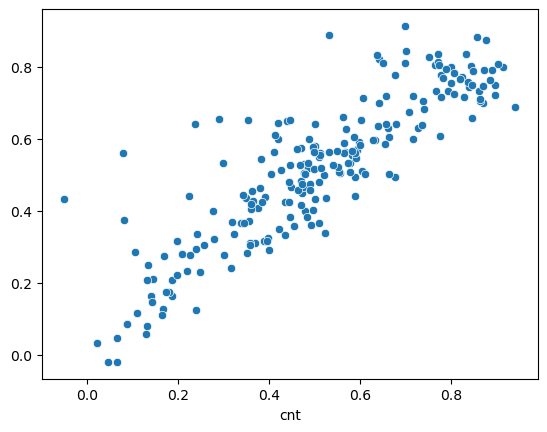

In [45]:
# Plot predicted y_test_pred and y_test
sns.scatterplot(x=y_test ,y=y_test_pred)

In [46]:
model4.params

const           0.038311
yr              0.245744
workingday      0.063078
temp            0.556799
windspeed      -0.103703
season_2        0.082586
season_4        0.177565
mnth_3          0.033279
mnth_9          0.077276
mnth_11        -0.067656
mnth_12        -0.063180
weekday_6       0.074325
weathersit_2   -0.078611
weathersit_3   -0.257723
dtype: float64

# Step 10 - Conclude model quality
---
Here we conclude on the efficacy of our model. The model shows R-square value of 75  which is close to the train data.
We also see the most critical variables are (with higher co efiicient value)
.   temp
.   weathersit_3   
.   yr